# 1.0 Overall Task Statistics

# Initial Setup

## Jupyter Extensions

Load [watermark](https://github.com/rasbt/watermark) to see the state of the machine and environment that's running the notebook. To make sense of the options, take a look at the [usage](https://github.com/rasbt/watermark#usage) section of the readme.

In [1]:
# Load `watermark` extension
%load_ext watermark

In [2]:
# Display the status of the machine and other non-code related info
%watermark -m -g -b -h

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 5.15.0-122-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Hostname: apra-xps13

Git hash: 55171b97ccaaffd4b5bdbd94aa6c6d395dd3e1f4

Git branch: master



Load [autoreload](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html) which will always reload modules marked with `%aimport`.

This behavior can be inverted by running `autoreload 2` which will set everything to be auto-reloaded *except* for modules marked with `%aimport`.

In [3]:
# Load `autoreload` extension
%load_ext autoreload

In [4]:
# Set autoreload behavior
%autoreload 1

Load `matplotlib` in one of the more `jupyter`-friendly [rich-output modes](https://ipython.readthedocs.io/en/stable/interactive/plotting.html). Some options (that may or may not have worked) are `inline`, `notebook`, and `gtk`.

In [5]:
# Set the matplotlib mode
%matplotlib inline

## Imports

In [6]:
# Standard library imports
from pathlib import Path

# Third party
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from loguru import logger

%aimport bouncing_ball_task.human_bouncing_ball
%aimport bouncing_ball_task.utils.pyutils
%aimport bouncing_ball_task.utils.visualize
from bouncing_ball_task.utils import pyutils, visualize 
from bouncing_ball_task import human_bouncing_ball as hbb
from bouncing_ball_task import index

# Display  versions of everything
%watermark -v -iv

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 8.28.0

pandas            : 2.2.3
seaborn           : 0.13.2
matplotlib        : 3.9.2
bouncing_ball_task: 0.0.0
numpy             : 2.1.2



In [7]:
# Suppress sci notation
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Loading Task Instance

In [32]:
# Task Parameters
human_video_parameters = {
    "size_frame": (size_frame := (256, 256)),
    "ball_radius": (ball_radius := 10),
    "dt": (dt := 0.1),
    "total_videos": (batch_size := 10000),
    "mask_center": (mask_center := 0.5),
    "mask_fraction": (mask_fraction := 1 / 3),
    "velocity_lower": (velocity_lower := 1 / 12.5),
    "velocity_upper": (velocity_upper := 1 / 7.5),
    "num_y_velocities": (num_y_velocities := 2),
    "pccnvc_lower": (pccnvc_lower := 0.0075),
    "pccnvc_upper": (pccnvc_upper := 0.06),
    "pccovc_lower": (pccovc_lower := 0.05),
    "pccovc_upper": (pccovc_upper := 0.95),
    "num_pccnvc": (num_pccnvc := 2),
    "num_pccovc": (num_pccovc := 3),
    "pvc" : (probability_velocity_change := 0.0),
    "num_pos_endpoints": (num_pos_endpoints := 5),
    "p_catch_trials": (p_catch_trials := 0.05),
    "bounce_offset": (bounce_offset := 4/5),
    "border_tolerance_outer": (border_tolerance_outer := 2.0),
    "border_tolerance_inner": (border_tolerance_inner := 1.0),
    "bounce_straight_split": (bounce_straight_split := 0.5),
    "use_logger": False,
    "print_stats": True,
}

task_parameters = {
    "size_frame": size_frame,
    "ball_radius": ball_radius,
    "target_future_timestep": (target_future_timestep := 1),
    "dt": dt,
    "sample_mode": (sample_mode := "parameter_array"),
    "target_mode": (target_mode := "parameter_array"),
    "mask_center": mask_center,
    "mask_fraction": mask_fraction,
    "mask_color": (mask_color := [127, 127, 127]),
    "sequence_mode": (sequence_mode := "reverse"),
    "debug": (debug := True),
    "sample_velocity_discretely": (sample_velocity_discretely := True),
    "return_change": (return_change := True),
    "return_change_mode": (return_change_mode := "source"),
    "min_t_color_change": (min_t_color_change := 15),
    "color_mask_mode": (color_mask_mode := "inner"),
    "initial_timestep_is_changepoint": (initial_timestep_is_changepoint := False),
}

size_x, size_y = size_frame

In [33]:
task, list_samples, list_targets, df_data, dict_metadata = hbb.generate_video_dataset(
    human_video_parameters,
    task_parameters,
    shuffle=False,
)
samples = task.samples
targets = task.targets

Dataset Generation Summary
  Num Total Trials: 10000 (1493 min 59.3 sec)
    length_trials_ms:       89639325
    video_length_min_ms:    8010
    video_length_max_ms:    18180
    video_length_min_f:     178
    video_length_max_f:     404
    ball_radius:            10
    dt:                     0.1
    duration:               45
    exp_scale:              1.0
    border_tolerance_outer: 2.0
    mask_center:            0.5
    mask_fraction:          0.3333333333333333
    size_x:                 256
    size_y:                 256
    num_pos_endpoints:      5
    pvc:                    0.0
    num_y_velocities:       2
    bounce_offset:          0.8
  Num Catch Trials: 500 (66 min 45.0 sec)
    Min Video Length (s):  8.0
    Max Video Length (s):  8.0
    Color Splits:          [np.float64(0.33), np.float64(0.33), np.float64(0.33)]
    pccnvc Splits:         [np.float64(0.5), np.float64(0.5)]
    pccovc Splits:         [np.float64(0.33), np.float64(0.33), np.float64(0.33)]
    

2024-10-08 19:12:19.404 | DEBUG    | bouncing_ball_task.bouncing_ball:color_mask_mode:465 - Running color_mask_mode setter
2024-10-08 19:12:19.405 | DEBUG    | bouncing_ball_task.bouncing_ball:sequence_mode:420 - Running sequence_mode setter
2024-10-08 19:12:19.406 | DEBUG    | bouncing_ball_task.bouncing_ball:resample_change_probabilities:491 - Running resample_change_probabilities
2024-10-08 19:12:19.421 | DEBUG    | bouncing_ball_task.bouncing_ball:color_sampling:397 - Running color_sampling setter
2024-10-08 19:12:19.429 | DEBUG    | bouncing_ball_task.bouncing_ball:return_change_mode:451 - Running return_change_mode setter


  Num Bounce Trials: 4750 (714 min 43.6 sec)
    Min Video Length (s):          8.0
    Max Video Length (s):          18.2
    Color Splits:                  [np.float64(0.33), np.float64(0.33), np.float64(0.33)]
    pccnvc Splits:                 [np.float64(0.5), np.float64(0.5)]
    pccovc Splits:                 [np.float64(0.33), np.float64(0.33), np.float64(0.33)]
    Stat Comb Splits:              [np.float64(0.17), np.float64(0.17), np.float64(0.17), np.float64(0.17), np.float64(0.17), np.float64(0.17)]
    End time Splits:               [np.float64(0.2), np.float64(0.2), np.float64(0.2), np.float64(0.2), np.float64(0.2)]
    Left/Right Splits:             [np.float64(0.5), np.float64(0.5)]
    Top/Bottom Splits:             [np.float64(0.5), np.float64(0.5)]
    Velocity Splits:               [np.float64(0.5), np.float64(0.5)]
    Final y position splits        [np.float64(0.46), np.float64(0.26), np.float64(0.16), np.float64(0.09), np.float64(0.04)]
    x=0 - Final y positio

In [34]:
df_data

,idx_trial,trial,idx_time,side_left_right,side_top_bottom,idx_velocity_y,idx_x_position,idx_y_position,length,Final Color,...,correct_response,PCCNVC_effective,PCCOVC_effective,PVC_effective,Bounces,Random Bounces,Color Change Bounce,Color Change Random,Hazard Rate,Contingency
Video ID,,,,,,,,,,,,,,,,,,,,,
0,0,catch,-1,-1,-1,-1,-1,-1,178,green,...,2,0.02256,0.85714,0.00000,7,0,6,6,Low,Low
1,1,catch,-1,-1,-1,-1,-1,-1,178,red,...,1,0.00000,0.40000,0.00000,5,0,2,0,High,Medium
2,2,catch,-1,-1,-1,-1,-1,-1,178,blue,...,3,0.04120,0.00000,0.00000,6,0,0,11,Low,High
3,3,catch,-1,-1,-1,-1,-1,-1,178,blue,...,3,0.01132,0.87500,0.00000,8,0,7,3,High,Low
4,4,catch,-1,-1,-1,-1,-1,-1,178,green,...,2,0.00743,0.50000,0.00000,4,0,2,2,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4745,bounce,4,1,1,1,4,4,220,blue,...,3,0.02606,1.00000,0.00000,8,0,8,8,Low,Low
9996,4746,bounce,0,0,1,1,0,0,196,green,...,2,0.00707,0.00000,0.00000,8,0,0,2,High,High
9997,4747,bounce,1,1,0,1,1,1,240,blue,...,3,0.03067,0.33333,0.00000,9,0,3,10,Low,Medium


In [35]:
df_data.columns

Index(['idx_trial', 'trial', 'idx_time', 'side_left_right', 'side_top_bottom',
       'idx_velocity_y', 'idx_x_position', 'idx_y_position', 'length',
       'Final Color', 'Final X Position', 'Final Y Position',
       'Final X Velocity', 'Final Y Velocity', 'PCCNVC', 'PCCOVC', 'PVC',
       'idx_position', 'last_visible_color', 'color_entered', 'color_next',
       'color_after_next', 'correct_response', 'PCCNVC_effective',
       'PCCOVC_effective', 'PVC_effective', 'Bounces', 'Random Bounces',
       'Color Change Bounce', 'Color Change Random', 'Hazard Rate',
       'Contingency'],
      dtype='object')

In [37]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idx_trial            10000 non-null  int64  
 1   trial                10000 non-null  object 
 2   idx_time             10000 non-null  int64  
 3   side_left_right      10000 non-null  int64  
 4   side_top_bottom      10000 non-null  int64  
 5   idx_velocity_y       10000 non-null  int64  
 6   idx_x_position       10000 non-null  int64  
 7   idx_y_position       10000 non-null  int64  
 8   length               10000 non-null  int64  
 9   Final Color          10000 non-null  object 
 10  Final X Position     10000 non-null  float32
 11  Final Y Position     10000 non-null  float32
 12  Final X Velocity     10000 non-null  float64
 13  Final Y Velocity     10000 non-null  float64
 14  PCCNVC               10000 non-null  float64
 15  PCCOVC               10000 non-null  

# Effective Statistics

Target change indices:
- [-4] - Velocity Change Bounce
- [-3] - Velocity Change Random
- [-2] - Color Change bounce
- [-1] - Color change random

## Fig - Hazard Rate Effective Stats

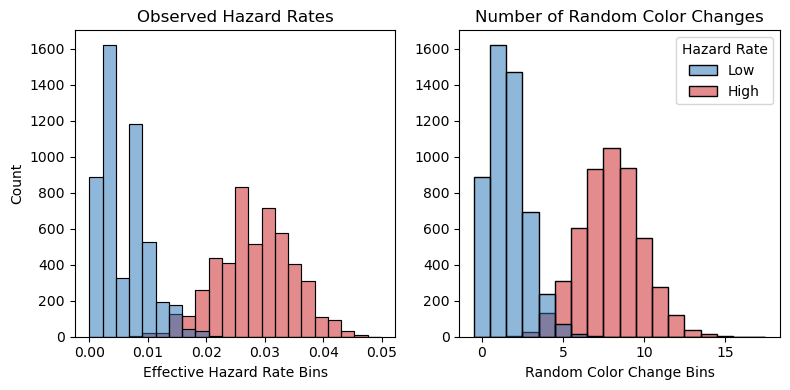

In [216]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(8,4))
palette = visualize.get_color_palette(
    ["Low", "High"],
    (("Blues", 1), ("Reds", 1)),
    linspace_range=(0.75, 1),
)

plot_params = [
    ("PCCNVC_effective", "Observed Hazard Rates", "Effective Hazard Rate Bins", {}),
    ("Color Change Random", "Number of Random Color Changes", "Random Color Change Bins", {"discrete": True}),
]

for i, (ax, (col, title, xlabel, plot_dict)) in enumerate(zip(axes, plot_params)):
    sns.histplot(
        df_data,
        x=col,
        hue="Hazard Rate",
        palette=palette,
        ax=ax,
        legend=True if i == len(plot_params) - 1 else False,
        **plot_dict,
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    if i != 0:
        ax.set_ylabel(None)

plt.tight_layout()
plt.show()

## Fig - Contingency Effective Stats

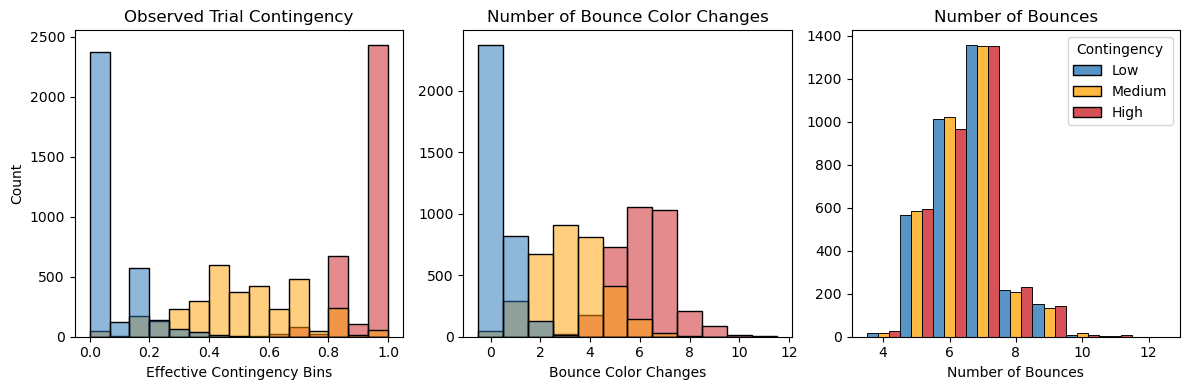

In [217]:
# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(12,4))
palette = visualize.get_color_palette(
    ["Low", "Medium", "High"],
    (("Blues", 1), ("Wistia", 1), ("Reds", 1)),
    linspace_range=(0.75, 1),
)

plot_params = [
    ("PCCOVC_effective", "Observed Trial Contingency", "Effective Contingency Bins", {}),
    ("Color Change Bounce", "Number of Bounce Color Changes", "Bounce Color Changes", {"discrete": True}),
    ("Bounces", "Number of Bounces", "Number of Bounces", {"discrete": True, "multiple":"dodge"}),
]

for i, (ax, (col, title, xlabel, plot_dict)) in enumerate(zip(axes, plot_params)):
    sns.histplot(
        df_data,
        x=col,
        hue="Contingency",
        palette=palette,
        ax=ax,
        legend=True if i == len(plot_params) - 1 else False,
        **plot_dict,
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    if i != 0:
        ax.set_ylabel(None)

plt.tight_layout()
plt.show()